In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tpot import TPOTClassifier
from tpot import TPOTRegressor

# EXECUTE FIRST
# computational imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint
from tpot import TPOTRegressor
from pprint import pprint
from scipy.stats import zscore
# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# display imports
from IPython.display import display, IFrame
from IPython.core.display import HTML

# import warnings
import warnings



/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:

#import the Lion's Tail Brewery data csv file
ltb1 = pd.read_csv('/Users/justinkahler/Desktop/LTB_Clean.csv')
ltb1

,Name,Type,Description,ABV,IBU,Average_Rating,Number_of_Ratings,Date_Added,general_type
0,Juice Cloud,IPA - New England / Hazy,"Brewed to minimize bitterness, and maximize de...",6.3,15,4.03,6050,7/27/17,IPA
1,Kula Wheat,Wheat Beer - American Pale Wheat,"Hawaiian for ""Golden"", Kula perfectly describe...",5.6,17,3.76,1855,11/20/15,Wheat Beer
2,Bomb Pop Slushee,Sour - Fruited,"Inspired by America's favorite summer treat, t...",5.3,5,4.21,1612,6/13/19,Sour
3,Mo' Juice,IPA - New England / Hazy,"This cloudy, juicy, New-England style IPA was ...",6.7,10,4.07,1735,12/26/17,IPA
4,Mile of Munich,Lager - Munich Dunkel,"""Mile of Munich"" is smooth and malty with toas...",5.4,19,3.73,1519,12/3/15,Lager
...,...,...,...,...,...,...,...,...,...
301,S'mores Imperial Stout,Stout - Imperial / Double,"Rich Stout with Graham Crackers, Marshmallow, ...",10.0,30,NaN,2,11/19/22,Stout
302,Charged With Pineapple,Pale Ale - American,NaN,NaN,N/A,NaN,0,3/16/21,Pale Ale
303,Seasonal Sour,Sour - Other,NaN,NaN,0,(N/A),0,9/22/22,Sour
304,Upside-Down Cake,Golden Ale,"Imperial golden ale with pineapple, maraschino...",11.0,N/A,(N/A),1,11/19/22,Golden Ale


In [3]:
# How many rows are there in the original data?
ltb1.count()

Name                 306
Type                 306
Description          282
ABV                  302
IBU                  306
Average_Rating       290
Number_of_Ratings    306
Date_Added           306
general_type         306
dtype: int64

In [4]:
#filtering
# selecting rows based on Number_of_ratings >10
# rows with less than 10 reviews don't have an Average_Rating
ltb2 = ltb1[ltb1['Number_of_Ratings'] > 10] 
ltb2.head()

,Name,Type,Description,ABV,IBU,Average_Rating,Number_of_Ratings,Date_Added,general_type
0,Juice Cloud,IPA - New England / Hazy,"Brewed to minimize bitterness, and maximize de...",6.3,15,4.03,6050,7/27/17,IPA
1,Kula Wheat,Wheat Beer - American Pale Wheat,"Hawaiian for ""Golden"", Kula perfectly describe...",5.6,17,3.76,1855,11/20/15,Wheat Beer
2,Bomb Pop Slushee,Sour - Fruited,"Inspired by America's favorite summer treat, t...",5.3,5,4.21,1612,6/13/19,Sour
3,Mo' Juice,IPA - New England / Hazy,"This cloudy, juicy, New-England style IPA was ...",6.7,10,4.07,1735,12/26/17,IPA
4,Mile of Munich,Lager - Munich Dunkel,"""Mile of Munich"" is smooth and malty with toas...",5.4,19,3.73,1519,12/3/15,Lager


In [5]:
# How many rows are left after filtering?
ltb2.count()

Name                 284
Type                 284
Description          272
ABV                  284
IBU                  284
Average_Rating       284
Number_of_Ratings    284
Date_Added           284
general_type         284
dtype: int64

In [6]:
# checking data types
ltb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 284
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               284 non-null    object 
 1   Type               284 non-null    object 
 2   Description        272 non-null    object 
 3   ABV                284 non-null    float64
 4   IBU                284 non-null    object 
 5   Average_Rating     284 non-null    object 
 6   Number_of_Ratings  284 non-null    int64  
 7   Date_Added         284 non-null    object 
 8   general_type       284 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 22.2+ KB


In [7]:
# convert just columns ABV, IBU, Average_Rating, Number_of_ratings

# using dictionary to convert specific columns
convert_dict = {'ABV': float,
                'IBU': float,
                'Average_Rating': float,
                'Number_of_Ratings': float,
                'Description': str
                }
 
ltb3 = ltb2.astype(convert_dict)
print(ltb3.dtypes)

# Had to convert Description to strbefore joining, there were numbers in it



Name                  object
Type                  object
Description           object
ABV                  float64
IBU                  float64
Average_Rating       float64
Number_of_Ratings    float64
Date_Added            object
general_type          object
dtype: object


In [8]:
regSubset = ltb3[["Average_Rating", "ABV","IBU"]]

regSubset.head()

,Average_Rating,ABV,IBU
0,4.03,6.3,15.0
1,3.76,5.6,17.0
2,4.21,5.3,5.0
3,4.07,6.7,10.0
4,3.73,5.4,19.0


In [9]:
# Find the top 10 Types
types_count = ltb3['Type'].value_counts() # Frequency of each class
types = list(types_count.keys()) # Complete list of styles
popularity = ltb3['Type'].value_counts(normalize = True) # Proportion of each class
top_ten = popularity[:10] # Top ten most common styles
top_ten_types = list(top_ten.keys()) # Class names

# Print results
print('Total Types: ',len(types))
print(" ")
print('Top Ten Types:')
print(top_ten)

Total Types:  77
 
Top Ten Types:
Sour - Fruited                    0.140845
Stout - Imperial / Double         0.088028
IPA - New England / Hazy          0.080986
Pale Ale - Milkshake              0.052817
IPA - American                    0.049296
Hard Seltzer                      0.031690
Pale Ale - American               0.031690
Porter - Other                    0.028169
Sour - Fruited Berliner Weisse    0.024648
Sour - Other                      0.021127
Name: Type, dtype: float64


In [10]:
#top_ten_data setup
top_ten_data = ltb3
top_ten_data

,Name,Type,Description,ABV,IBU,Average_Rating,Number_of_Ratings,Date_Added,general_type
0,Juice Cloud,IPA - New England / Hazy,"Brewed to minimize bitterness, and maximize de...",6.3,15.0,4.03,6050.0,7/27/17,IPA
1,Kula Wheat,Wheat Beer - American Pale Wheat,"Hawaiian for ""Golden"", Kula perfectly describe...",5.6,17.0,3.76,1855.0,11/20/15,Wheat Beer
2,Bomb Pop Slushee,Sour - Fruited,"Inspired by America's favorite summer treat, t...",5.3,5.0,4.21,1612.0,6/13/19,Sour
3,Mo' Juice,IPA - New England / Hazy,"This cloudy, juicy, New-England style IPA was ...",6.7,10.0,4.07,1735.0,12/26/17,IPA
4,Mile of Munich,Lager - Munich Dunkel,"""Mile of Munich"" is smooth and malty with toas...",5.4,19.0,3.73,1519.0,12/3/15,Lager
...,...,...,...,...,...,...,...,...,...
279,Pumpkin Pie Dunkel,Lager - Munich Dunkel,"German Lager with notes of pumpkin, cinnamon, ...",5.4,20.0,4.21,11.0,11/20/21,Lager
280,Orange Slushee,Fruit Beer,nan,5.1,0.0,4.15,12.0,3/17/21,Fruit Beer
281,Blueberry Banana Vanilla Slushee,Sour - Smoothie / Pastry,"Smoothie-style slushee sour, as thick with rea...",4.9,0.0,4.13,12.0,6/25/22,Sour
282,Blood Orange IPA,IPA - American,Amber IPA hopped generously dry-hopped with Ca...,7.2,66.0,3.81,12.0,7/14/17,IPA


In [12]:
top_ten_types

['Sour - Fruited',
 'Stout - Imperial / Double',
 'IPA - New England / Hazy',
 'Pale Ale - Milkshake',
 'IPA - American',
 'Hard Seltzer',
 'Pale Ale - American',
 'Porter - Other',
 'Sour - Fruited Berliner Weisse',
 'Sour - Other']

In [14]:
#regsubset distributions
#Combining the 3 columns into a list
avRating = regSubset["Average_Rating"]
abv = regSubset["ABV"]
ibu = regSubset["IBU"]

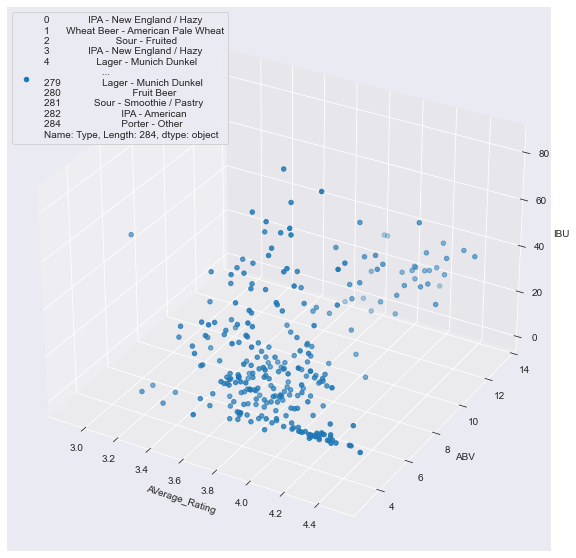

In [15]:
fig1 = plt.figure(1)
fig1.set_figheight(10)
fig1.set_figwidth(10)
ax = fig1.add_subplot(111, projection = '3d')
#ax = plt.axes(projection='3d')

# Data for a three-dimensional line
#zline = avRating
#xline = abv
#yline = ibu
#ax.plot3D(xline, yline, zline, 'gray')
#temp = regSubset2.loc[ top_ten_data['Type'] == s ] # Subset of each style
s=top_ten_data['Type']

# Data for three-dimensional scattered points
zdata = ibu
xdata = avRating
ydata = abv
#ax.scatter3D(xdata, ydata, zdata, c=zdata, label = s);#, cmap='Greens');
ax.scatter3D(xdata, ydata, zdata, label = s);#, cmap='Greens');


#ax.scatter(temp['Average_Rating'], temp['ABV'], temp['IBU'], label = s) # Plot new subset



ax.view_init(30, -60)
ax.set_xlabel('AVerage_Rating')
ax.set_ylabel('ABV')
ax.set_zlabel('IBU')
plt.legend(loc = 2);

In [16]:
#Check What it looks like:
regSubset

,Average_Rating,ABV,IBU
0,4.03,6.3,15.0
1,3.76,5.6,17.0
2,4.21,5.3,5.0
3,4.07,6.7,10.0
4,3.73,5.4,19.0
...,...,...,...
279,4.21,5.4,20.0
280,4.15,5.1,0.0
281,4.13,4.9,0.0
282,3.81,7.2,66.0


In [17]:
# Setup training and test groups

#in x get all columns except Price column
X = regSubset.loc[:, regSubset.columns != 'Average_Rating']
#use Price column as target variable
y= regSubset['Average_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
#function to output a model assessment
def my_regression_results(model) :
    score_test = model.score(X_test, y_test)
    print ('Model r-squared score from test data: {:0.4f}'. format(score_test))
    y_pred = model.predict (X_test)
    import matplotlib.pyplot as plt
    plt.plot (y_test, y_pred, 'k.')
    plt.xlabel( 'Test Values')
    plt. ylabel ( 'Predicted Values') ;
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error (y_test, y_pred)
    rmse = np.sqrt (mse)
    print ('Mean squared error on test data: {:0.2f}'. format (mse))
    print ('Root mean squared error on test data: {:0.2f}'. format (rmse))
    return (round (rmse, 2))

Model r-squared score from test data: 0.3917
Mean squared error on test data: 0.03
Root mean squared error on test data: 0.19


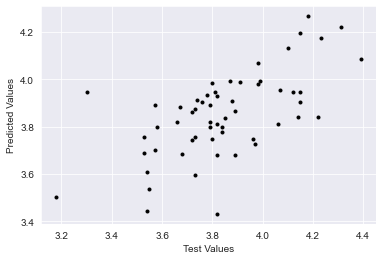

In [19]:

#Extra Tress Regression Model
et_model = ExtraTreesRegressor (random_state=123)
et_model.fit(X_train,y_train)
#baseline
rmse = my_regression_results(et_model)



In [20]:

# run GridSearchCV with the RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#use this seed
np.random.seed(123)


# define the grid
params = {
        'bootstrap': [True,False],
        'min_samples_split': [2,8],
        'n_estimators': [50,100,150],
        'max_features':[1,15,30],
        'min_samples_leaf': [1, 15]
         }


# setup the grid search
grid_search = GridSearchCV(ExtraTreesRegressor(),
                           param_grid=params,
                           cv=5,
                           verbose=1,
                           n_jobs=1,
                           return_train_score=True)

grid_search.fit(X_train, y_train)
#X_train, X_test, y_train, y_test

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.disp

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 15, 30],
                         'min_samples_leaf': [1, 15],
                         'min_samples_split': [2, 8],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, verbose=1)

Model r-squared score from test data: 0.4458
Mean squared error on test data: 0.03
Root mean squared error on test data: 0.18


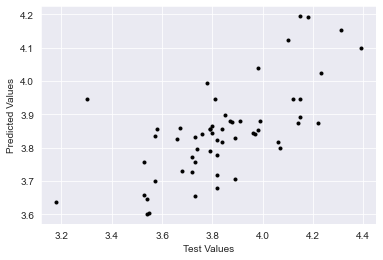

In [21]:
#grid_search.fit(X_train, y_train)
#grid_search.best_params_
gs_rmse = my_regression_results(grid_search)

In [22]:
#Randomized Search to find best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

#use this seed
np.random.seed(123)

params = {
         'bootstrap': [True, False],
         'max_features': randint(1,30),
         'min_samples_leaf': randint(1,20),
         'min_samples_split': randint(2,20),
         'n_estimators': randint(10,150),
         }

random_search = RandomizedSearchCV(
    ExtraTreesRegressor(),
    param_distributions= params,
    #random_state = 123,
    n_iter=25,
    cv=5,
    verbose=1,
    n_jobs=1,
    return_train_score=True)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispa

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=25, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5cae5f490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5ca90adf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c929cc10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5cad8ff70>},
                   return_train_score=True, verbose=1)

Model r-squared score from test data: 0.3508
Mean squared error on test data: 0.04
Root mean squared error on test data: 0.19


0.19

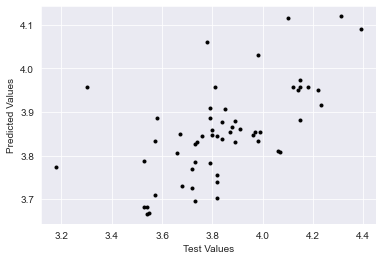

In [23]:
my_regression_results(random_search)

In [24]:
#TPOT code
from tpot import TPOTRegressor
#ExtraTreesRegressor

#use this seed
np.random.seed(123)


tpot_config = {
    'sklearn.ensemble.ExtraTreesRegressor':
        {
         'bootstrap': [0,1],
         'max_features': range(1, 31),
         'min_samples_leaf': range(1, 21),
         'min_samples_split': range(2, 21),
         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
         }}



tpot = TPOTRegressor(scoring = 'r2',
                     generations=5,
                     population_size=10,
                     verbosity=2,
                     config_dict=tpot_config,
                     cv=3,
                     #template='Regressor', #no stacked models
                     random_state=123)

tpot.fit(X_train, y_train)
tpot.export('tpot_sklearn.ensemble.ExtraTreesRegressor.py') # export the model


Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.3730261899619651

Generation 2 - Current best internal CV score: 0.3730261899619651

Generation 3 - Current best internal CV score: 0.3735436170712069

Generation 4 - Current best internal CV score: 0.3735436170712069

Generation 5 - Current best internal CV score: 0.3735436170712069

Best pipeline: ExtraTreesRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=0, max_features=1, min_samples_leaf=1, min_samples_split=13, n_estimators=60)


Model r-squared score from test data: 0.4589
Mean squared error on test data: 0.03
Root mean squared error on test data: 0.18


0.18

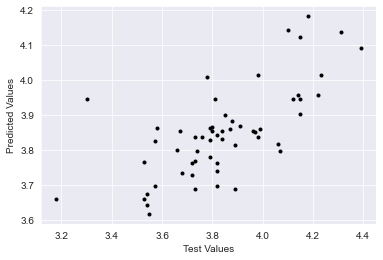

In [25]:
my_regression_results(tpot)

In [26]:
#Setting up Elastic Net
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#Importing the librariesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Setting the value for X and Y
xx = ltb3[["ABV", "IBU"]]
yy = ltb3["Average_Rating"]

In [28]:
#Splitting the datasetfrom sklearn.model_selection 
#import train_test_splitxx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size = 0.25, random_state = 100)


xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.25, random_state=123)







In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np
 
# Assume you have independent variables X and a dependent variable y
#X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
#y = np.array([1, 2, 3, 4])
 
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
# Fit the model to the data
reg.fit(xx, yy)
 
# Print the coefficients of the model
print(reg.coef_)


#Interestingly this shows that ABV has a higher correlation with a higher Average Rating.
# IBU has a slightly negative correlation to average rating.  The higher the IBU, the likelier it is that a beer 
#will have a lower average rating. 

[ 0.068221   -0.00483734]


In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [32]:
#Elastic Net
enet_model = ElasticNetCV().fit(xx_train, yy_train)

Model r-squared score from test data: 0.2268
Mean squared error on test data: 0.04
Root mean squared error on test data: 0.21


0.21

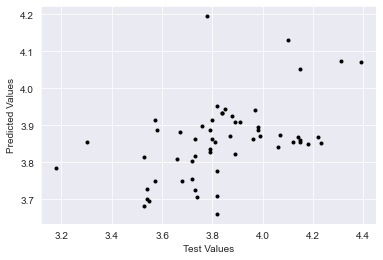

In [33]:
my_regression_results(enet_model)